**Котов Арсений 4181**


Необходимо построить нейронную сеть для управления поведением персонажа компьютерной игры в зависимости от обстановки окружающей среды.

Исходные данные: 2 файла в формате .csv (обучающая и тестовая выборки), в которых представленные следущие данные.

* Здоровье (градация состояния от 0 до 0)
* Имеет нож (1 - имеет, 0 - не имеет)
* Имеет пистолет (1 - имеет, 0 - не имеет)
* Присутствует ли враг (количество врагов)

**(Эти данные будут подаваться на вход нейронной сети)**

Последний столбец - действие:
* Уворачиваться
* Атаковать
* Прятаться
* Бежать

**(Действие мы представим в виде вектора [0,0,0,n])**



# Импорты


In [ ]:
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import random

model=1
print('Версия библиотеки tensorflow -', tf.__version__)
print('Версия Keras -', tf.keras.__version__)


Версия библиотеки tensorflow - 2.9.2
Версия Keras - 2.9.0


Подготовка данных для работы с нейронной сетью.
Для начала загрузим все выборки:

* Обучающая - data_train_lab5.csv

* Тестовая - data_test_lab5.csv

После чего приведем к виду, доступному нейронной сети

In [ ]:
do = pd.read_csv('data_train_lab5.csv')
dt = pd.read_csv('data_test_lab5.csv')

# входные данные
x_train = do.iloc[:, 0:4]
x_test = dt.iloc[:, 0:4]

# результат(действие)
y_train = do.select_dtypes(include=[object])
y_test = dt.select_dtypes(include=[object])

# Уникальные значения(варианты действий)
Beh = y_train.Beh.unique() # ['dodge' 'attack' 'hide' 'run']

le = preprocessing.LabelEncoder()

y_train_labels = y_train.apply(le.fit_transform)
y_test_labels = y_test.apply(le.fit_transform)

y_train_vec = to_categorical(y_train_labels)
y_test_vec = to_categorical(y_test_labels)



**Мы преобразовали вариации действий в набор чисел, где**
* **0 - атака**
* **1 - уворачиваться**
* **2 - прятаться**
* **3 - бежать.**

(train_labels)

**дальше их преобразовали в вектора**

*   **[1 0 0 0] - атака.**
*   **[0 1 0 0] - уворачиваться.**
*   **[0 0 1 0] - прятаться.**
*   **[0 0 0 1] - бежать**

(y_train_vec)

# Построение модели нейронной сети и её визуализация.


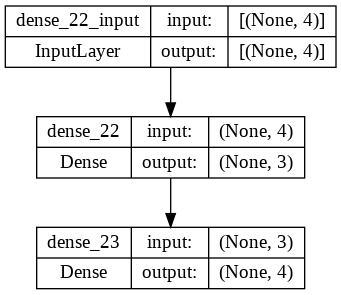

In [ ]:

model = models.Sequential()
model.add(layers.Dense(3, activation='relu', input_shape=(4,)))
model.add(layers.Dense(4, activation='softmax'))

plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 3)                 15        
                                                                 
 dense_23 (Dense)            (None, 4)                 16        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Компиляция модели

In [ ]:
opt=SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение

In [ ]:
history=model.fit(x_train, y_train_vec, validation_data=(x_test, y_test_vec), epochs=100, batch_size=1)

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1.4029 - accuracy: 0.2778 - val_loss: 1.3100 - val_accuracy: 0.5714
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1.3188 - accuracy: 0.4444 - val_loss: 1.2260 - val_accuracy: 0.5714
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2934 - accuracy: 0.4444 - val_loss: 1.1925 - val_accuracy: 0.5714
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2895 - accuracy: 0.4444 - val_loss: 1.1833 - val_accuracy: 0.5714
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2907 - accuracy: 0.4444 - val_loss: 1.1803 - val_accuracy: 0.5714
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 1.3006 - accuracy: 0.4444 - val_loss: 1.1719 - val_accuracy: 0.5714
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2929 - accuracy: 0.4444 - val_loss: 1.1974 - val_accuracy: 0.5714
Epoch 8/100
1

# Получение весов обученной модели

In [ ]:
model.get_weights()

[array([[-0.45589164, -0.8337712 ,  0.01348726],
        [-0.73201746,  0.6765219 , -0.52119315],
        [ 0.17389715,  0.35504508, -0.08374469],
        [-0.2552902 , -0.8136753 , -0.15842165]], dtype=float32),
 array([ 0.       ,  0.       , -0.1367348], dtype=float32),
 array([[-0.67205894, -0.23535252, -0.31566036,  0.23728943],
        [-0.47259295, -0.84796613,  0.6475576 ,  0.30382228],
        [-0.6407922 , -0.12835513,  0.07470521, -0.15826592]],
       dtype=float32),
 array([-0.00331292, -0.02958115,  0.7082138 , -0.67531985], dtype=float32)]

# Визуализация обучения

In [ ]:
def plot_history(history_name):
  plt.figure(figsize=(18,7))
  plt.grid()
  mas_legend = []
  for history,name in history_name:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    mas_legend.append('train-{}'.format(name))
    mas_legend.append('test-{}'.format(name))
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(mas_legend, loc='upper left')
  plt.show()

def plot_history2(history_name):
  plt.figure(figsize=(18,7))
  plt.grid()
  mas_legend = []
  for history,name in history_name:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    mas_legend.append('train-{}'.format(name))
    mas_legend.append('test-{}'.format(name))
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(mas_legend, loc='upper left')
  plt.show()



In [ ]:
def get_history(activation='linear',model=0):
  model = models.Sequential()
  model.add(layers.Dense(3, activation=activation, input_shape=(4,)))
  model.add(layers.Dense(4, activation='softmax'))
  opt=SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history=model.fit(x_train, y_train_vec, validation_data=(x_test, y_test_vec), epochs=100, batch_size=1)
  return history

In [ ]:
historys_names = []

for i in ["relu",'linear','sigmoid','softmax','softplus']:
  history = get_history(i)
  historys_names.append((history,i))


Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1.5393 - accuracy: 0.3889 - val_loss: 1.0878 - val_accuracy: 0.5714
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2853 - accuracy: 0.4444 - val_loss: 1.1789 - val_accuracy: 0.4286
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2443 - accuracy: 0.3333 - val_loss: 1.0394 - val_accuracy: 0.5714
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1101 - accuracy: 0.5000 - val_loss: 0.9416 - val_accuracy: 0.7143
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0345 - accuracy: 0.6111 - val_loss: 0.8527 - val_accuracy: 0.7143
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.6667 - val_loss: 0.7338 - val_accuracy: 0.7143
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8275 - accuracy: 0.6111 - val_loss: 0.6619 - val_accuracy: 0.7143
Epoch 8/100
1

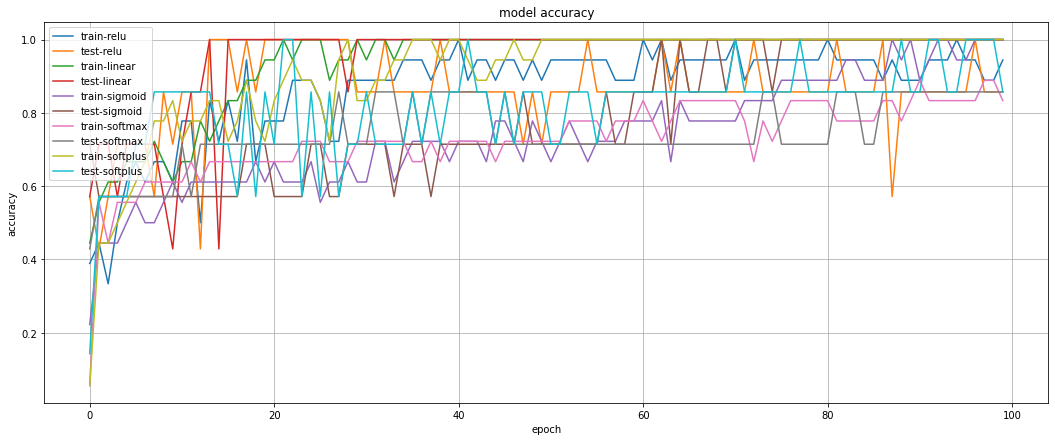

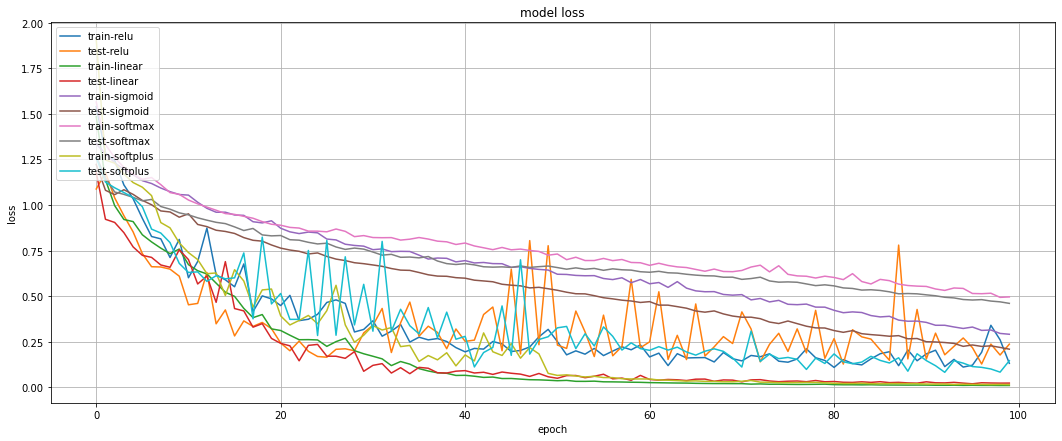

In [ ]:
plot_history(historys_names)
plot_history2(historys_names)

# обучение с добавлением рандомных данных

In [ ]:
do = pd.read_csv('data_train_lab5.csv')
dt = pd.read_csv('data_test_lab5.csv')

x_train = do.iloc[:, 0:4]
x_test = dt.iloc[:, 0:4]

y_train = do.select_dtypes(include=[object])
y_test = dt.select_dtypes(include=[object])



def r():
  return random.randrange(0, 3, 1)

for i in range(6):
  x_train = x_train.append({ "a":r(),"b":r() , "c":r(),  "d":r()}, ignore_index = True)
  y_train = y_train.append({'Beh':random.choice(['dodge', 'attack' ,'hide' ,'run'])},ignore_index = True)

Beh = y_train.Beh.unique() # ['dodge' 'attack' 'hide' 'run']

le = preprocessing.LabelEncoder()

y_train_labels = y_train.apply(le.fit_transform)
y_test_labels = y_test.apply(le.fit_transform)

y_train_vec = to_categorical(y_train_labels)
y_test_vec = to_categorical(y_test_labels)

In [ ]:
historys_names = []
for i in ["relu",'linear','sigmoid','softmax','softplus']:
  history = get_history(i)
  historys_names.append((history,i))

Epoch 1/100
24/24 [==============================] - 0s 7ms/step - loss: 1.6571 - accuracy: 0.1250 - val_loss: 1.4223 - val_accuracy: 0.4286
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4064 - accuracy: 0.3750 - val_loss: 1.2257 - val_accuracy: 0.5714
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3747 - accuracy: 0.3333 - val_loss: 1.2901 - val_accuracy: 0.2857
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3406 - accuracy: 0.2917 - val_loss: 1.3092 - val_accuracy: 0.1429
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2936 - accuracy: 0.3333 - val_loss: 1.2556 - val_accuracy: 0.2857
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3010 - accuracy: 0.3750 - val_loss: 1.1048 - val_accuracy: 0.5714
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2931 - accuracy: 0.2917 - val_loss: 1.1439 - val_accuracy: 0.2857
Epoch 8/100
2

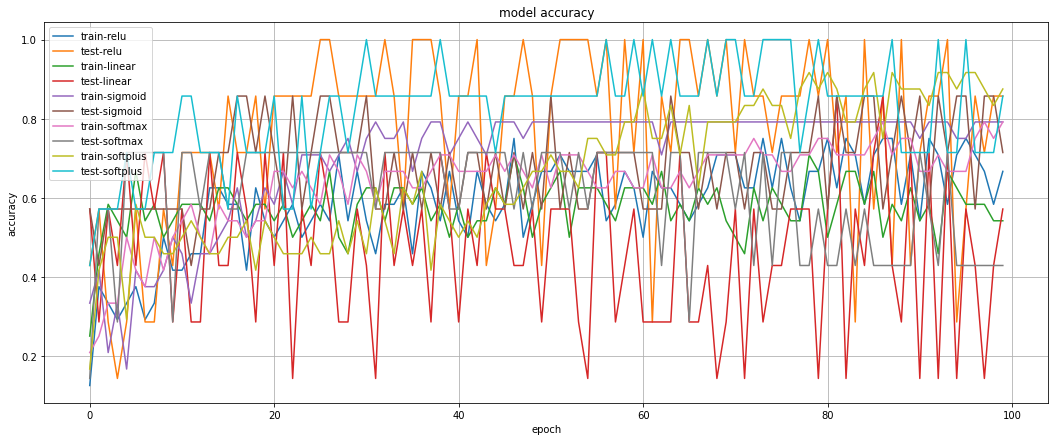

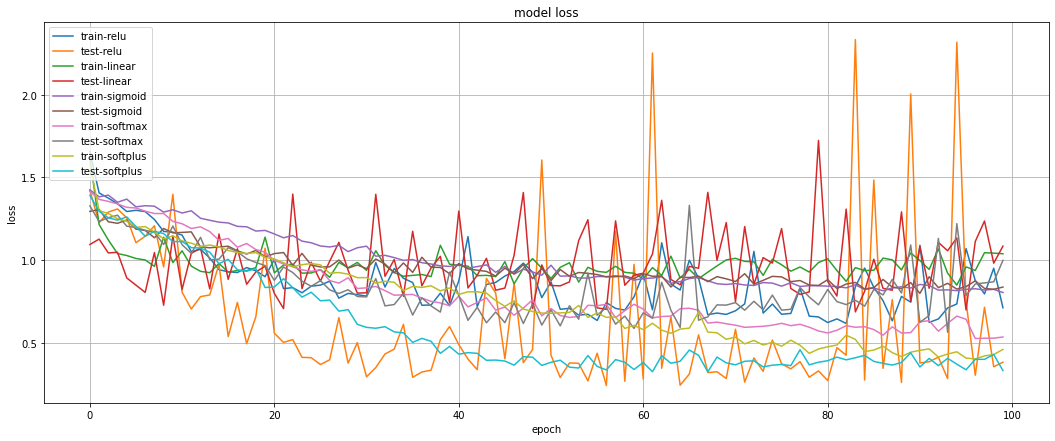

In [ ]:
plot_history(historys_names)
plot_history2(historys_names)

# Выводы
 Таким образом, можно сделать вывод, что результат может зависеть данных и их полноты, потому что если ввести выборку, к которой сеть была не готова (не обучена), то можно получить совершенно другой результат.
Если добавить рандомные или неполные данные, связь между данными вероятно станет меньше, и обучение нейронной сети это подтверждает.

# Литература
 - Preprocessing - https://scikit-learn.org/stable/modules/preprocessing.html
 - Tensorflow, keras - https://www.tensorflow.org/api_docs/python/tf/keras